# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [20]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [21]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [22]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [23]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [24]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [25]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

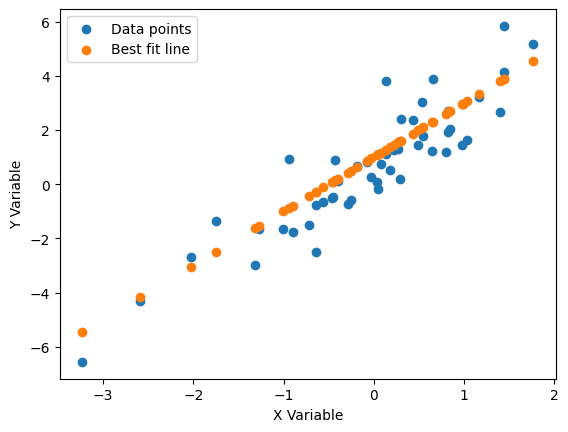

In [26]:
#overlapping plots, use plt.show() after both graphs; in between graphs gets two seperate graphs
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [27]:
# Write your own code here
subset_above2 = dataset.query("y>=2")
og_len =  (len(dataset))
new_len = (len(subset_above2))
print ("The original len of the dataset was " + str (og_len) + " and the subset_above 2 has a len of " + str(new_len))
print ("The proprotion of subsetted observation is " + str(new_len/og_len))


The original len of the dataset was 50 and the subset_above 2 has a len of 13
The proprotion of subsetted observation is 0.26


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [29]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()
my_subset = dataset.query (" abs (y-@ybar) <= @stdv_sample ")
display(my_subset)



,x,e,y,p
1,1.403737,-1.130025,2.677449,3.807473
2,0.549892,-0.332169,1.767615,2.099784
4,1.036157,-1.426703,1.645610,3.072313
5,-0.397146,-0.086299,0.119410,0.205709
6,0.289485,-1.372185,0.206785,1.578970
8,0.822109,-0.725796,1.918422,2.644218
10,-0.723520,-1.048945,-1.495985,-0.447040
12,0.301353,0.794413,2.397120,1.602707
13,-0.940750,1.798003,0.916503,-0.881500
14,-0.465871,-0.597227,-0.528969,0.068258


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [30]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [31]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    0.725495
x            2.076219
dtype: float64


<font size = "5">

Plot the best fit line

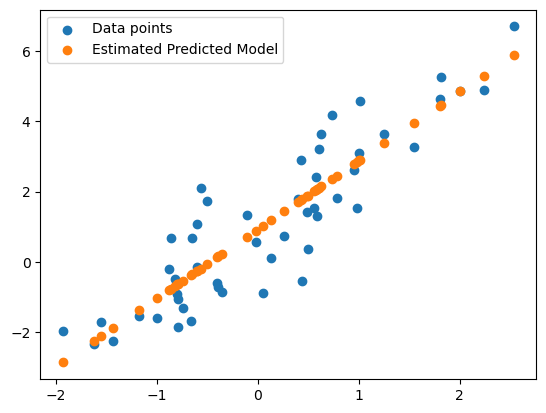

In [ ]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

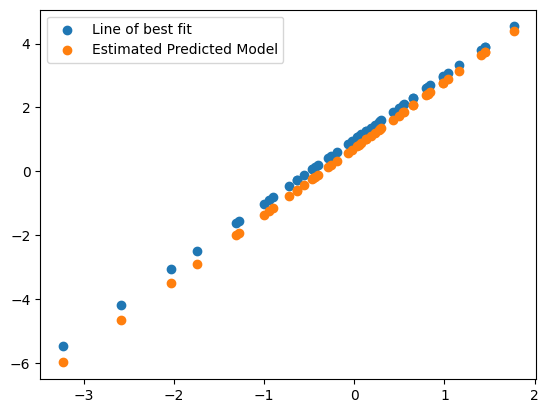

In [34]:
# Write your own code

plt.scatter(x = dataset["x"],y = dataset["p"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])
plt.legend(labels = ["Line of best fit","Estimated Predicted Model"])
plt.show()




<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [35]:
# Write your own code

dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]
fn_positive_error = lambda error: error >= 0
dataset["positive_error"] = dataset["sample_error"].apply(fn_positive_error)


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [ ]:
# Write your own code

dataset["error_sqr"] = dataset["sample_error"] ** 2
dataset["error_sqr"].mean()


